In [1]:
import numpy as np
import pandas as pd
import sympy as sy

In [2]:
sy.init_printing()

In [3]:
L = sy.Symbol('L')
lmbda = sy.Symbol(r'\lambda')
f1 = sy.Symbol(r'F_1')
f2 = sy.Symbol(r'F_2')

sigma_L = sy.Symbol(r'\sigma_L')
sigma_lmbda = sy.Symbol(r'\sigma_\lambda')
sigma_f1 = sy.Symbol(r'\sigma_F_1')
sigma_f2 = sy.Symbol(r'\sigma_F_2')

sigmas = {
    L: sigma_L,
    lmbda: sigma_lmbda,
    f1: sigma_f1,
    f2: sigma_f2
}

In [4]:
values = {
    L: np.float64('1.24'),
    lmbda: np.float64('0.000000532'),
    f1: np.float64('0.025'),
    f2: np.float64('0.110'),
    sigma_L: np.float64('0.005'),
    sigma_lmbda: np.float64('0.0000000005'),
    sigma_f1: np.float64('0.0005'),
    sigma_f2: np.float64('0.0005'),
}

In [5]:
m = sy.Symbol('m')
l = sy.Symbol('l')

sigma_l = sy.Symbol(r'\sigma_l')

values[sigma_l] = np.float64('0.0005')
sigmas[l] = sigma_l

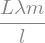

In [6]:
d = m * lmbda * L / l
d

In [7]:
def get_sigma(formula, sigmas):
    sigma_res = 0
    for symb in formula.free_symbols:
        if symb in sigmas.keys():
            sigma_res += formula.diff(symb) ** 2 * sigmas[symb]**2
    return sy.sqrt(sigma_res)

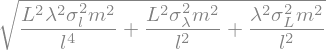

In [8]:
sigma_d = get_sigma(d, sigmas)
sigma_d

In [9]:
def sub_to_df(df: pd.DataFrame, column, formula, constant_vals: dict, keys_of_symbols: dict, dtype=np.float64):
    for i in range(len(df[column])):
        vals = constant_vals
        for symb in keys_of_symbols.keys():
            vals[symb] = df.loc[i, keys_of_symbols[symb]]
        df.loc[i, column] = dtype(formula.subs(vals))

Пункт 1

In [10]:
d_1 = {
    "grid": np.array([1, 2, 3], dtype=np.float64),
    "l": np.array([0.266, 0.265, 0.242], dtype=np.float64),
    "m": np.array([4, 10, 18], dtype=np.float64),
    "d": [None, None, None],
    "sigma_d": [None, None, None]
}

data_1 = pd.DataFrame(data=d_1, dtype=np.float64)
data_1

,grid,l,m,d,sigma_d
0,1.0,0.266,4.0,NaN,NaN
1,2.0,0.265,10.0,NaN,NaN
2,3.0,0.242,18.0,NaN,NaN


In [20]:
sub_to_df(data_1, "d", 10**6 * d, values, {m: "m", l: "l"})
sub_to_df(data_1, "sigma_d", 10**6 * sigma_d, values, {m: "m", l: "l"})
data_1

,grid,l,m,d,sigma_d
0,1.0,0.266,4.0,9.920000,0.045107
1,2.0,0.265,10.0,24.893585,0.113266
2,3.0,0.242,18.0,49.067107,0.227045


Пункт 2

In [25]:
a_1 = sy.Symbol('a_1')
a_2 = sy.Symbol('a_2')
b_1 = sy.Symbol('b_1')
b_2 = sy.Symbol('b_2')

values[a_1] = np.float64('0.115')
values[a_2] = values[f2]
values[b_1] = np.float128('0.155') - values[a_2]
values[b_2] = values[L] - np.float128('0.155') - values[a_1]
values[a_2]

In [13]:
sigma_a_1 = sy.Symbol(r'\sigma_a_1')
sigma_a_2 = sy.Symbol(r'\sigma_a_2')
sigma_b_1 = sy.Symbol(r'\sigma_b_1')
sigma_b_2 = sy.Symbol(r'\sigma_b_2')

values[sigma_a_1] = np.float64('0.0005')
values[sigma_a_2] = np.float64('0.0005')
values[sigma_b_1] = 2 * values[sigma_a_1]
values[sigma_b_2] = 3 * values[sigma_a_1]

sigmas[a_1] = sigma_a_1
sigmas[a_2] = sigma_a_2
sigmas[b_1] = sigma_b_1
sigmas[b_2] = sigma_b_2

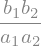

In [14]:
Gamma = b_1 * b_2 / (a_1 * a_2)

sigma_Gamma = get_sigma(Gamma, sigmas)
Gamma

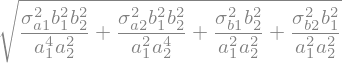

In [15]:
sigma_Gamma

In [16]:
print(f"Г = ({Gamma.subs(values):.2f} +- {sigma_Gamma.subs(values):.2f})")

Г = (3.45 +- 0.08)


In [17]:
d_2 = {
    "grid": np.array([1, 2, 3], dtype=np.float64),
    "l": np.array([0.292, 0.439, 0.440], dtype=np.float64),
    "m": np.array([1, 4, 8], dtype=np.float64),
    "d": [None, None, None],
    "sigma_d": [None, None, None]
}
data_2 = pd.DataFrame(data=d_2, dtype=np.float64)
data_2

,grid,l,m,d,sigma_d
0,1.0,0.292,1.0,NaN,NaN
1,2.0,0.439,4.0,NaN,NaN
2,3.0,0.440,8.0,NaN,NaN


In [26]:
sub_to_df(data_2, "d", 10**6 * d * Gamma, values, {m: "m", l: "l"})
sub_to_df(data_2, "sigma_d", 10**6 * d*sy.sqrt((sigma_d / d)**2 + (sigma_Gamma/Gamma)**2), values, {m: "m", l: "l"})
data_2

,grid,l,m,d,sigma_d
0,1.0,0.292,1.0,7.795504,0.053264
1,2.0,0.439,4.0,20.740657,0.141505
2,3.0,0.440,8.0,41.387038,0.282365
